In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 3/digitrecogniser.csv")

In [ ]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


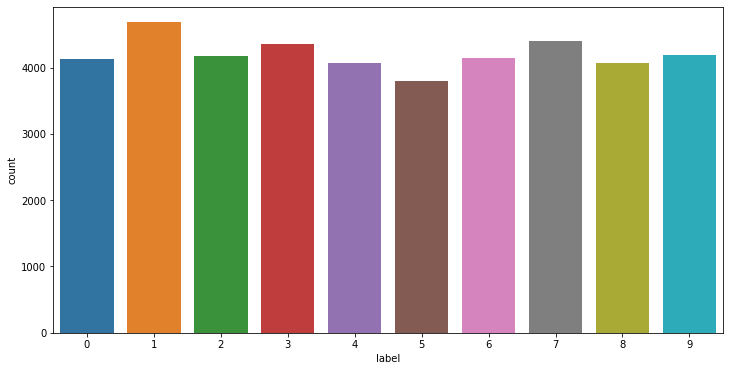

In [ ]:
import seaborn as sns
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="label", ax=ax,data=data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
labels=data['label'].values

In [ ]:
X_data = data.drop('label',1).values

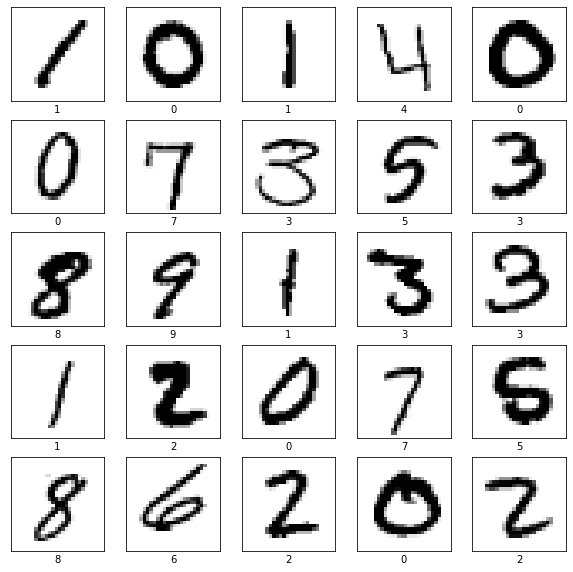

In [ ]:
X = X_data.reshape(X_data.shape[0], 28, 28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.20)

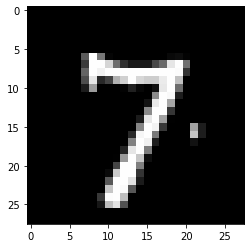

In [ ]:
plt.imshow((X_train[7].reshape(28, 28)), cmap = 'gray')        # imshow is function to open the image
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training on KNN algorithms


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 6.38165807723999


In [33]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([9, 6, 9, ..., 6, 0, 9])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       823
           1       0.95      0.99      0.97       972
           2       0.93      0.92      0.92       842
           3       0.91      0.93      0.92       832
           4       0.95      0.92      0.93       824
           5       0.92      0.93      0.92       760
           6       0.96      0.97      0.97       842
           7       0.93      0.92      0.93       870
           8       0.97      0.90      0.93       812
           9       0.90      0.91      0.90       823

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

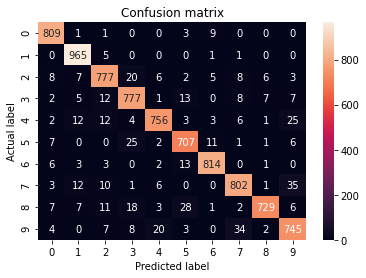

In [36]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,y_pred)
pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Training on Random Forest algorithms

In [37]:
import time
start = time.time()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 23.540093421936035


In [ ]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

In [ ]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,pred)
pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [38]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
score = cross_val_score(rf, X_train, y_train)
print (np.mean(score))

0.9607440476190476
